#Laboratorio 01 Programación Cientifica
####Victor Jopia, Vicente Riveros


Cargar librerias


In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

Definir funciones de calculo de distancia y rapidez media


In [ ]:
def distancia_euclidea(punto_frame_1, punto_frame_2):
    x1, y1 = punto_frame_1
    x2, y2 = punto_frame_2
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

def rapidez(punto_1, punto_2, tiempo):
  distancia = distancia_euclidea(punto_1, punto_2)
  rapid = distancia/tiempo
  return rapid

Montar el disco virtual de google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




*   Carga y lectura de datos por linea
*   Calculo de rapidez media y numero total de personas participando en el experimento


*   Graficas







La rapidez media de la persona con ID 1 es: 1.6668956647565196[m/seg]
La rapidez media de la persona con ID 2 es: 1.4319752957011376[m/seg]
La rapidez media de la persona con ID 3 es: 1.4331271096785128[m/seg]
La rapidez media de la persona con ID 4 es: 1.3491067513080524[m/seg]
La rapidez media de la persona con ID 5 es: 1.339149672186045[m/seg]
La rapidez media de la persona con ID 6 es: 1.4520338657279772[m/seg]
La rapidez media de la persona con ID 7 es: 1.3578829655473938[m/seg]
La rapidez media de la persona con ID 8 es: 1.3047612477749517[m/seg]
La rapidez media de la persona con ID 9 es: 1.3306517549942236[m/seg]
La rapidez media de la persona con ID 10 es: 1.6782654408427466[m/seg]
La rapidez media de la persona con ID 11 es: 1.2754123481360946[m/seg]
La rapidez media de la persona con ID 12 es: 1.3342832421698703[m/seg]
La rapidez media de la persona con ID 13 es: 1.3703545298178692[m/seg]
La rapidez media de la persona con ID 14 es: 1.337552511893539[m/seg]
La rapidez media 

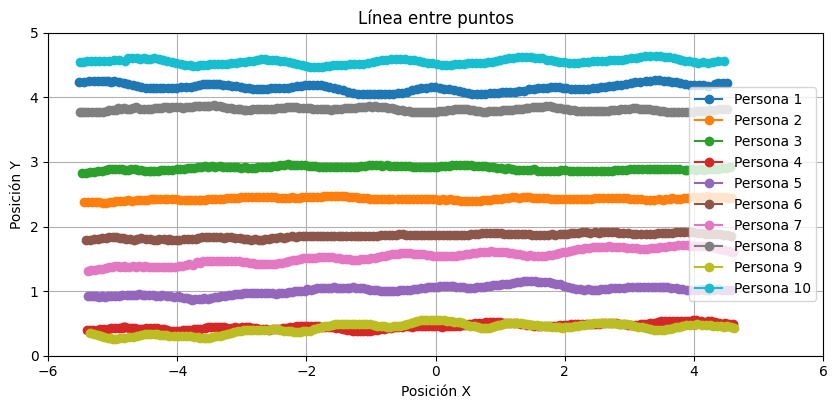

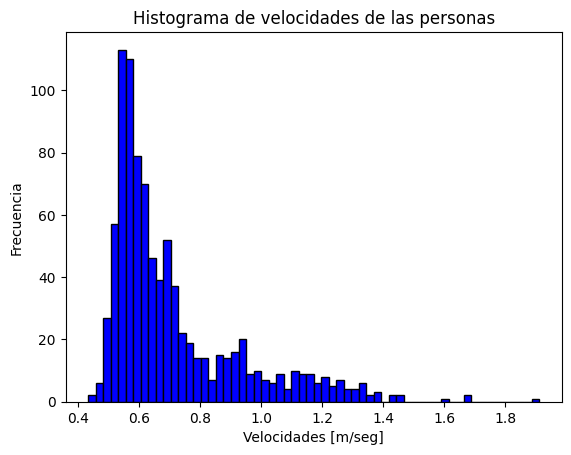

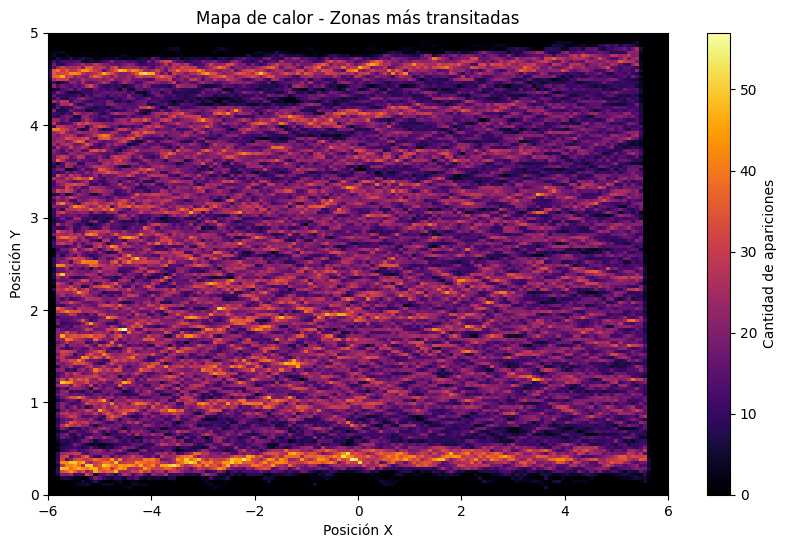

In [ ]:
# Cargar archivo de texto en modo lectura
with open('/content/drive/MyDrive/Colab Notebooks/traj_UNI_CORR_500_05 (1).txt', 'r') as archivo:
    for i in range(4):
        archivo.readline()


    personas = {}
    posiciones_en_x = []    #para el heatmap
    posiciones_en_y = []

    for linea in archivo:
        #leer
        datos = linea.split()
        id = int(datos[0])
        frame = int(datos[1])
        x = float(datos[2])
        y = float(datos[3])
        z = float(datos[4])
        #crear keys del diccionario
        if id not in personas:
            personas [id] = {"datos" : []}

        #valores de las keys
        personas [id]["datos"].append((frame,x,y,z))

        posiciones_en_x.append(x)  # Agregar todas las posiciones x a la lista para cargar la matriz del heatmap
        posiciones_en_y.append(y)

    #ordenar por frame
    for id in personas:
        personas[id]["datos"] = sorted(personas[id]["datos"], key=lambda frame:frame[0])
        #print(personas[1])
        #print(personas.keys())


    rapidez_media = []

    #calcular velocidad media de todas las personas
    for id in personas:
        lista_rapidez = []
        tiempo = 1.0/25.0

        punto1 = personas[id]["datos"][0][1:3] #x,y


        for p in personas[id]["datos"][1:]:
            punto2 = p[1:3]  # x, y del segundo frame
            lista_rapidez.append(rapidez(punto1, punto2, tiempo))  # rapidez
            punto1 = punto2


        rapidez_media.append(sum(lista_rapidez)/len(lista_rapidez))
        #rapidez_media = sum(lista_rapidez)/len(lista_rapidez)

        print(f"La rapidez media de la persona con ID {id} es: {sum(lista_rapidez)/len(lista_rapidez)}[m/seg]")
    print()
    print(f"El numero total de personas que participaron en el experimento es:", len(personas))
    print()
    print(f"La rapidez media de todas las personas es: {sum(rapidez_media)/len(rapidez_media)}[m/seg]")
    print()

    #Graficas
    # Dibujar línea entre los dos puntos
    fig, ax = plt.subplots(figsize=(10, 6))
    #Grafica de ejemplo
    for id in list(personas.keys())[:10]: #aqui obtenemos todas las keys (los id's) y los convertimos a lista, de los cuales
                                          # tomamos los primeros 10 para graficar, se convierte a lista debido a que, como tal,
                                          # no se puede hacer slicing a las keys de un diccionario
        x_vals = [dato[1] for dato in personas[id]["datos"]]
        y_vals = [dato[2] for dato in personas[id]["datos"]]

        ax.plot(x_vals, y_vals, marker='o', linestyle='-', label=f'Persona {id}')
    # Etiquetas en los puntos
    #for i, dato in enumerate(persona_1):
    #    ax.text(dato[1], dato[2] + 0.005, f"{dato[0]}", ha='center')


    # Configuración del gráfico
    ax.set_title("Línea entre puntos")
    ax.set_xlabel("Posición X")
    ax.set_ylabel("Posición Y")
    ax.set_xlim(-6, 6)
    ax.set_ylim(0, 5)
    ax.grid(True)
    ax.legend()
    ax.set_aspect('equal')

    plt.show()
# Crear un histograma de todas las velocidades
    plt.hist(rapidez_media, bins=60, color='blue', edgecolor='black')  # bins define el número de intervalos

    # Agregar títulos y etiquetas
    plt.title('Histograma de velocidades de las personas')
    plt.xlabel('Velocidades [m/seg]')
    plt.ylabel('Frecuencia')

    # Mostrar el histograma
    plt.show()

    #heatmap
     #heatmap
    heatmap, borde_x, borde_y = np.histogram2d(posiciones_en_x, posiciones_en_y, bins=[150,150], range=[[-5.6, 5], [0, 5]])

    #en mi opinion el rango de 150 - 200 bins es el mejor rango, se ve mas claro y no tan pixeleado, al aumentar a >300 la
    #diferencia se vuelve casi imperceptible, y al bajar a <100 se ve muy pixelado, por lo que 150 es un buen rango

    plt.figure(figsize=(10, 6))
    plt.imshow(
        heatmap.T,  # transpuesta
        origin='lower',  # el 0,0 está abajo a la izquierda
        cmap='inferno',#inferno > hot ; magma
        extent=[-6, 6, 0, 5],
        aspect='auto'
    )

    plt.colorbar(label='Cantidad de apariciones')
    plt.title('Mapa de calor - Zonas más transitadas')
    plt.xlabel('Posición X')
    plt.ylabel('Posición Y')
    plt.grid(False)
    plt.show()

#¿Qué se puede aprender de los resultados?
Según el mapa de calor, las regiones con mayor densidad de flujo peatonal parecen estar ubicadas en zonas clave, lo que indica trayectorias frecuentes y patrones de comportamiento particulares. El gráfico de trayectoria muestra que los peatones suelen tomar rutas parecidas, posiblemente influenciadas por obstáculos, caminos favoritos o interacciones con otros viandantes. Los histogramas muestran que las frecuencias de ciertos comportamientos (como velocidades o direcciones) tienen picos particulares, lo que respalda la noción de patrones predecibles.


#¿qué estructura de datos es la mejor para  resolver el problema?
Basado en los gráficos, las matrices de características vectoriales son ideales para representar las trayectorias. Estas matrices pueden incluir información como la posición (x, y), la velocidad y la dirección en diferentes instantes. Si se trabaja con datos dispersos (por ejemplo, trayectorias donde hay pocas actualizaciones por tiempo), el uso de matrices dispersas sería más eficiente.   Además, la agrupación de datos en clusters, observada en el mapa de calor, sugiere que estructuras como k-d trees o quad trees serían útiles para realizar búsquedas espaciales eficientes.

#¿Qué mejoraría en la implementación de este problema?


*   A partir del mapa de calor, se puede llevar a cabo una segmentación del área para estudiar regiones concretas con mayor concentración de transeúntes, lo que podría aumentar la exactitud del modelo.
*   Añadir variables extra como tiempo, clima o densidad del entorno, puesto que estas podrían afectar los patrones registrados en las trayectorias.
*   Efectuar una normalización de los datos para disminuir el efecto de escalas diferentes, lo que podría potenciar el rendimiento general de los modelos

#¿Cuál es el rendimiento computacional (espacio y tiempo) de este problema?
Espacio: De acuerdo con los gráficos, manejar datos de trayectorias implica registrar varios puntos por cada peatón. Para maximizar el espacio, se podría utilizar una representación de trayectorias que minimice el número de puntos sin sacrificar la precisión.

Tiempo:
El desempeño computacional en términos de tiempo está relacionado con el tamaño del conjunto de datos, el número de peatones y los métodos de análisis empleados. El manejo de trayectorias largas o de varios peatones aumenta el tiempo requerido, sobre todo si se llevan a cabo comparaciones exhaustivas entre trayectorias o cálculos iterativos, como sucede con los mapas de calor. Métodos como el clustering espacial o preprocesamientos eficaces (normalización y eliminación de ruido) pueden disminuir el tiempo, pero, en términos generales, el rendimiento crece de manera lineal con datos optimizados y de forma exponencial en situaciones no optimizadas
#¿Qué se puede inferir del comportamiento de los peatones en este tipo de problemas?
Dado los gráficos:  

Los histogramas de frecuencias, particularmente en cuanto a la velocidad y dirección, tienden a mostrar que la mayoría de los peatones, con algunas excepciones, se comportan de forma uniforme.  

El mapa de calor señala que los peatones tienden a concentrarse en ciertas áreas, probablemente debido a caminos preferidos del peaton o restricciones fisicas del entorno.  

El gráfico de trayectorias da cuenta de que los peatones utilizan rutas tradicionales con poco margen de variación, lo que sugiere una rutina.








